**Test Script For FRA333 HW3**
- Member
    - นายปวริศ อัศวกิจธนานนท์ 653405000347

In [1]:
import roboticstoolbox as rtb
import numpy as np
from math import pi
from spatialmath import *
from HW3_utils import *
from FRA333_HW3_6537 import *

In [2]:
d1 = 0.0892
a2 = -0.425
T_3_e = SE3(-0.39243,-0.093,0.109) * SE3(-0.082,0,0) * SE3.RPY([0,-pi/2,0])
robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(d = d1 , offset=pi), # {1}
        rtb.RevoluteMDH(alpha=pi/2), # {2}
        rtb.RevoluteMDH(a=a2), # {3}
    ],tool = T_3_e, name="6R robot")
print(robot)

DHRobot: 6R robot, 3 joints (RRR), dynamics, modified DH parameters
┌────────┬───────┬────────────┬────────┐
│  aⱼ₋₁  │ ⍺ⱼ₋₁  │     θⱼ     │   dⱼ   │
├────────┼───────┼────────────┼────────┤
│    0.0 │  0.0° │  q1 + 180° │ 0.0892 │
│    0.0 │ 90.0° │         q2 │    0.0 │
│ -0.425 │  0.0° │         q3 │    0.0 │
└────────┴───────┴────────────┴────────┘

┌──────┬─────────────────────────────────────────────────┐
│ tool │ t = -0.47, -0.093, 0.11; rpy/xyz = 0°, -90°, 0° │
└──────┴─────────────────────────────────────────────────┘



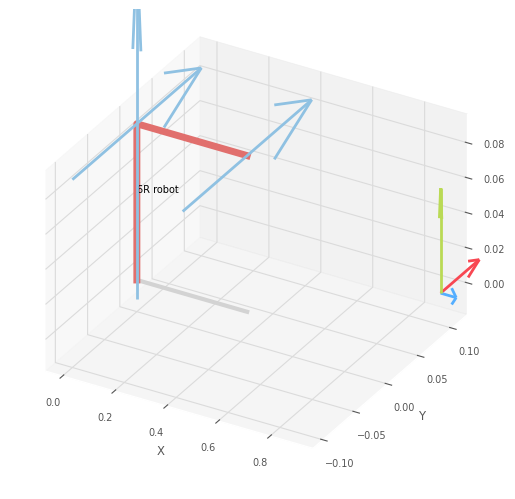

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, '6R robot')

<Figure size 640x480 with 0 Axes>

In [3]:
q = [0,0,0]
robot.plot(q)

In [4]:
print(robot.fkine(q))
print("-----------")
R,P,R_e,p_e = FKHW3(q)
print(p_e)
print(R_e)

   0         0         1         0.8994    
   1         0         0         0.109     
   0         1         0        -0.0038    
   0         0         0         1         

-----------
[ 0.89943  0.109   -0.0038 ]
[[ 6.1232343e-17  6.1232343e-17  1.0000000e+00]
 [ 1.0000000e+00 -1.2246469e-16 -6.1232343e-17]
 [ 1.2246469e-16  1.0000000e+00 -6.1232343e-17]]


In [5]:
print(robot.jacob0(q))
print(endEffectorJacobianHW3(q))

[[-1.09000000e-01 -9.30000000e-02 -9.30000000e-02]
 [ 8.99430000e-01  6.64634188e-17  4.04396743e-17]
 [-4.08684541e-34 -8.99430000e-01 -4.74430000e-01]
 [ 0.00000000e+00  1.22464680e-16  1.22464680e-16]
 [-2.29584502e-49  1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  6.12323400e-17  6.12323400e-17]]
[[-1.09000000e-01 -9.30000000e-02 -9.30000000e-02]
 [ 8.99430000e-01  6.64634217e-17  4.04396760e-17]
 [ 0.00000000e+00 -8.99430000e-01 -4.74430000e-01]
 [ 0.00000000e+00  1.22464685e-16  1.22464685e-16]
 [ 0.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  6.12323426e-17  6.12323426e-17]]


In [6]:
q = [0.1,2.1,1.14]
w = [5,2,8,4,5,10]

m_e = w[:3]
f_e = w[3:]
a = robot.pay(W=f_e + m_e , q = q,frame=1)

b = computeEffortHW3(q,w)
print(a)
print(b)

[ 2.77629165 -4.67215404 -1.69785   ]
[[ 4.40369087e-01 -2.01232568e+00 -0.00000000e+00 -0.00000000e+00
   0.00000000e+00 -1.20433503e+00]
 [ 2.44463433e+00 -6.67753116e-02 -2.70570488e+00  8.60185133e-01
   4.13981495e+00 -7.37442554e-17]
 [-1.49406141e+00  4.08103638e-02 -1.84889900e+00  8.60185133e-01
   4.13981495e+00 -7.37442554e-17]]
